*This notebook was developed by Marina Ricci for the DESC CL_Cosmo_Pipeline team.*
## This notebook aims at presenting the stage that compute cluster ensemble (stacked) profiles in richness/redshift bins. We will see how to run the code from the notebook (I) or in pipeline mode (II).

It is meant to be run independently. If you already produced the necessary outputs `ceci` will use them, and otherwise create them.
___

In [1]:
import os
from pprint import pprint
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
import ceci
import h5py
import yaml
import pickle as pkl

Make sure to change your path in the next cell that leads to your TXPipe directory. See examples for IN2P3 and NERSC below.

In [2]:
#user specific paths -- IN2P3 example
my_txpipe_dir = "/pbs/home/m/mricci/throng_mricci/desc/TXPipe"

#user specific paths -- NERSC example
#my_txpipe_dir = "/pscratch/sd/a/avestruz/TXPipe"

os.chdir(my_txpipe_dir)

import txpipe

___

# I - Let's start working with the 1deg2 data file on Jupyter

First we will do some runs on the 1 deg^2 example data set with around 80k galaxies. This is small enough that we can do it all in jupyter.

The data set, which is based on CosmoDC2, contains pre-computed photo-z and and contains a RedMapper cluster catalog for the field.

## This initiates and run the stage

In [3]:
print("Options for this pipeline and their defaults:")
print(txpipe.extensions.CLClusterEnsembleProfiles.config_options)

pip_stage = txpipe.extensions.CLClusterEnsembleProfiles.make_stage(
    #cluster_catalog="./data/example/inputs/cluster_catalog.hdf5",
    cluster_shear_catalogs="./data/cosmodc2/outputs-1deg2-CL/cluster_shear_catalogs.hdf5",
    fiducial_cosmology="./data/fiducial_cosmology.yml",
    cluster_catalog_tomography="./data/cosmodc2/outputs-1deg2-CL/cluster_catalog_tomography.hdf5",
    

    # This is the output for this stage
    cluster_profiles="./data/cosmodc2/outputs-1deg2-CL/cluster_profiles.pkl",

    # This contains all the options for this stage. You can override them here, as we do with the max_radius below.
    config="./examples/cosmodc2/Cluster_pipelines/config-1deg2-CL.yml",

)

Options for this pipeline and their defaults:
{'r_min': 0.2, 'r_max': 3.0, 'nbins': 5, 'delta_sigma_profile': True, 'shear_profile': False, 'magnification_profile': False}


In [4]:
print("Actual options used for this pipeline (as defined in config file or default):")
print(pip_stage.config)

Actual options used for this pipeline (as defined in config file or default):
{r_min:0.5,r_max:5.0,nbins:5,delta_sigma_profile:True,shear_profile:False,magnification_profile:False,cluster_shear_catalogs:./data/cosmodc2/outputs-1deg2-CL/cluster_shear_catalogs.hdf5,fiducial_cosmology:./data/fiducial_cosmology.yml,cluster_catalog_tomography:./data/cosmodc2/outputs-1deg2-CL/cluster_catalog_tomography.hdf5,cluster_profiles:./data/cosmodc2/outputs-1deg2-CL/cluster_profiles.pkl,config:./examples/cosmodc2/Cluster_pipelines/config-1deg2-CL.yml,}


In [5]:
pip_stage.run()
pip_stage.finalize()

[0.5        0.7924466  1.25594322 1.99053585 3.15478672 5.        ]
62257 62257 62257
euclidean
bin_zbin_0_richbin_0 <HDF5 group "/cluster_bin/bin_zbin_0_richbin_0" (8 members)> {'rich_max': 10.0, 'rich_min': 5.0, 'z_max': 0.4, 'z_min': 0.2} 5         ra                 dec         ...      richness        id  
------------------ ------------------- ... ----------------- -------
 60.90715205643431  -30.24513872352905 ... 9.660612106323242 17462.0
60.745430693132285 -30.722831995395694 ... 6.640127182006836 30553.0
 60.13513592278265  -30.18630075837688 ... 6.533342361450195 32634.0
 60.65087062021594 -30.035446420971837 ... 6.716402053833008 25937.0
 60.32661050735002 -30.939506455543473 ... 6.350282669067383 26346.0
Ncluster 5
For cluster 17462.0 at z= 0.2546227276325226 with n_source =  2516 theta_max is 21.18328309733986  arcmin = 4.998997459605253 Mpc
GCMetaData([('coordinate_system', 'euclidean'), ('cosmo', None)])
!!! maximum radial distance of source smaller than radial_bins
For

/pbs/throng/lsst/users/mricci/desc/TXPipe/conda/lib/python3.10/site-packages/clmm/gcdata.py:80: UserWarning: coordinate_system not set, defaulting to 'euclidean'
  warnings.warn("coordinate_system not set, defaulting to 'euclidean'")
/pbs/throng/lsst/users/mricci/desc/TXPipe/conda/lib/python3.10/site-packages/clmm/gcdata.py:80: UserWarning: coordinate_system not set, defaulting to 'euclidean'
  warnings.warn("coordinate_system not set, defaulting to 'euclidean'")
/pbs/throng/lsst/users/mricci/desc/TXPipe/conda/lib/python3.10/site-packages/clmm/gcdata.py:80: UserWarning: coordinate_system not set, defaulting to 'euclidean'
  warnings.warn("coordinate_system not set, defaulting to 'euclidean'")


For cluster 15382.0 at z= 0.5205168724060059 with n_source =  1056 theta_max is 13.384113759667283  arcmin = 4.9999353650707405 Mpc
GCMetaData([('coordinate_system', 'euclidean'), ('cosmo', None)])
!!! maximum radial distance of source smaller than radial_bins
For cluster 17011.0 at z= 0.4551392197608948 with n_source =  379 theta_max is 14.400023164872492  arcmin = 4.99439352803043 Mpc
GCMetaData([('coordinate_system', 'euclidean'), ('cosmo', None)])
!!! maximum radial distance of source smaller than radial_bins
For cluster 20888.0 at z= 0.5699324607849121 with n_source =  881 theta_max is 12.755650020433894  arcmin = 4.992009110159386 Mpc
GCMetaData([('coordinate_system', 'euclidean'), ('cosmo', None)])
!!! maximum radial distance of source smaller than radial_bins
For cluster 33429.0 at z= 0.5001161694526672 with n_source =  1402 theta_max is 13.666959980640502  arcmin = 4.997192595976103 Mpc
GCMetaData([('coordinate_system', 'euclidean'), ('cosmo', None)])
!!! maximum radial distan

/pbs/throng/lsst/users/mricci/desc/TXPipe/conda/lib/python3.10/site-packages/clmm/gcdata.py:80: UserWarning: coordinate_system not set, defaulting to 'euclidean'
  warnings.warn("coordinate_system not set, defaulting to 'euclidean'")
/pbs/throng/lsst/users/mricci/desc/TXPipe/conda/lib/python3.10/site-packages/clmm/gcdata.py:80: UserWarning: coordinate_system not set, defaulting to 'euclidean'
  warnings.warn("coordinate_system not set, defaulting to 'euclidean'")
/pbs/throng/lsst/users/mricci/desc/TXPipe/conda/lib/python3.10/site-packages/clmm/gcdata.py:80: UserWarning: coordinate_system not set, defaulting to 'euclidean'
  warnings.warn("coordinate_system not set, defaulting to 'euclidean'")


For cluster 13025.0 at z= 0.5495550036430359 with n_source =  486 theta_max is 12.997509274591385  arcmin = 4.9944186445746555 Mpc
GCMetaData([('coordinate_system', 'euclidean'), ('cosmo', None)])
!!! maximum radial distance of source smaller than radial_bins
For cluster 11651.0 at z= 0.5927656888961792 with n_source =  737 theta_max is 12.524547480225769  arcmin = 4.9964648712283575 Mpc
GCMetaData([('coordinate_system', 'euclidean'), ('cosmo', None)])
!!! maximum radial distance of source smaller than radial_bins
cluster ensemble computed
covariance computed
cl_ensemble_created
bin_zbin_2_richbin_0 <HDF5 group "/cluster_bin/bin_zbin_2_richbin_0" (8 members)> {'rich_max': 10.0, 'rich_min': 5.0, 'z_max': 0.8, 'z_min': 0.6} 13         ra                 dec         ...      richness        id  
------------------ ------------------- ... ----------------- -------
60.326126517158364  -30.91291736913871 ... 7.997819900512695 11300.0
  60.3906485346257  -30.32504676069136 ... 8.2724094390869

## This load and explore the outputs

In [6]:
data = pkl.load(open(pip_stage.config['cluster_profiles'],"rb"))

### The data is a dictionary with bin names as keys and CLMM.clusterEnsemble objects as associated data. When a bin has no cluster, the data is None.

In [7]:
data

{'bin_zbin_0_richbin_0': {'cluster_bin_edges': {'rich_max': 10.0,
   'rich_min': 5.0,
   'z_max': 0.4,
   'z_min': 0.2},
  'n_cl': 5,
  'clmm_cluster_ensemble': <clmm.clusterensemble.ClusterEnsemble at 0x7f794bfcb280>},
 'bin_zbin_0_richbin_1': {'cluster_bin_edges': {'rich_max': 100.0,
   'rich_min': 10.0,
   'z_max': 0.4,
   'z_min': 0.2},
  'n_cl': 3,
  'clmm_cluster_ensemble': <clmm.clusterensemble.ClusterEnsemble at 0x7f794bfcbd90>},
 'bin_zbin_1_richbin_0': {'cluster_bin_edges': {'rich_max': 10.0,
   'rich_min': 5.0,
   'z_max': 0.6,
   'z_min': 0.4},
  'n_cl': 20,
  'clmm_cluster_ensemble': <clmm.clusterensemble.ClusterEnsemble at 0x7f794bfcb100>},
 'bin_zbin_1_richbin_1': {'cluster_bin_edges': {'rich_max': 100.0,
   'rich_min': 10.0,
   'z_max': 0.6,
   'z_min': 0.4},
  'n_cl': 8,
  'clmm_cluster_ensemble': <clmm.clusterensemble.ClusterEnsemble at 0x7f794bffc580>},
 'bin_zbin_2_richbin_0': {'cluster_bin_edges': {'rich_max': 10.0,
   'rich_min': 5.0,
   'z_max': 0.8,
   'z_min': 

### Functions to plot the output

In [8]:
def plot_stacked_delta_sigma_profile(cl_stacked_data, title=None, ax=None):
    if ax==None:
        ax = plt.axes()

    ax.semilogx(cl_stacked_data.stacked_data['radius'],cl_stacked_data.stacked_data['tangential_comp'],'bx-',label="tan")
    ax.semilogx(cl_stacked_data.stacked_data['radius'],cl_stacked_data.stacked_data['cross_comp'],'ro-',label="cross")

    ax.errorbar(cl_stacked_data.stacked_data['radius'], cl_stacked_data.stacked_data['tangential_comp'], yerr=cl_stacked_data.cov['tan_sc'].diagonal() ** 0.5 , color='blue')
    ax.errorbar(cl_stacked_data.stacked_data['radius'], cl_stacked_data.stacked_data['cross_comp'], yerr=cl_stacked_data.cov['cross_sc'].diagonal() ** 0.5 , color='red')


    for i in range(len(cl_stacked_data)):
        ax.plot(
            cl_stacked_data.data["radius"][i],
            cl_stacked_data.data["tangential_comp"][i] ,
            "blue",
            #label="Individual",
            alpha=0.2,
            linewidth=1,
        )

    for i in range(len(cl_stacked_data)):
        ax.plot(
            cl_stacked_data.data["radius"][i],
            cl_stacked_data.data["cross_comp"][i] ,
            "red",
            #label="Individual",
            alpha=0.2,
            linewidth=1,
        )
    
    ax.legend()
    ax.set_ylabel('delta_sigma')
    ax.set_xlabel('radius')
    ax.set_title(title)
    return ax


In [9]:
def plot_stacked_delta_sigma_profile_together(data, richbin="vary", zbin="0", profile_type='tangeantial', title=None, ax=None):
    if ax==None:
        ax = plt.axes()

    if richbin=="vary":
        for j in range(len(config_bin_info['richedge'])-1):
            i = zbin
            bin_name='bin_zbin_'+str(i)+'_richbin_'+str(j)
    
            print (bin_name)
            stack_profile = data[bin_name]['clmm_cluster_ensemble'].stacked_data
            stack_cov = data[bin_name]['clmm_cluster_ensemble'].cov
    
            ax.semilogx(stack_profile['radius'],stack_profile['tangential_comp'],'k.')
            ax.errorbar(stack_profile['radius'], stack_profile['tangential_comp'], yerr=stack_cov['tan_sc'].diagonal() ** 0.5 , label=bin_name)
    
            
    ax.legend()  
    ax.set_ylabel('delta_sigma')
    ax.set_xlabel('radius')
    ax.set_title(title)
    
    
        

In [10]:
def plot_covariance(cl_stacked_data, cov_type='tan_sc', title=None, ax=None):
    if ax==None:
        ax = plt.axes()

    cov = ax.imshow(cl_stacked_data.cov[cov_type], origin='lower')
    plt.colorbar(cov, ax=ax)
    
    ax.set_ylabel('radius')
    ax.set_xlabel('radius')
    ax.set_title(title)


### Plot stacked profile

<Axes: title={'center': 'bin_zbin_0_richbin_1'}, xlabel='radius', ylabel='delta_sigma'>

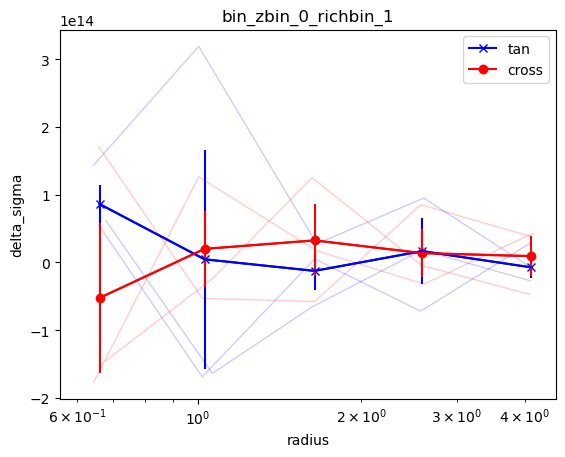

In [16]:
plot_stacked_delta_sigma_profile(data['bin_zbin_0_richbin_1']['clmm_cluster_ensemble'], 'bin_zbin_0_richbin_1' )

In [19]:
config_bin_info = config_content['CLClusterBinningRedshiftRichness']

NameError: name 'config_content' is not defined

NameError: name 'config_bin_info' is not defined

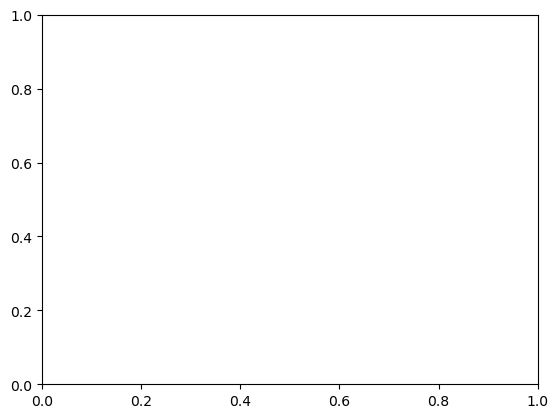

In [17]:
plot_stacked_delta_sigma_profile_together(data, richbin="vary", zbin="4", profile_type='tangeantial', title=None, ax=None)

bin_zbin_0_richbin_0
bin_zbin_0_richbin_1
bin_zbin_1_richbin_0
bin_zbin_1_richbin_1
bin_zbin_2_richbin_0
bin_zbin_2_richbin_1


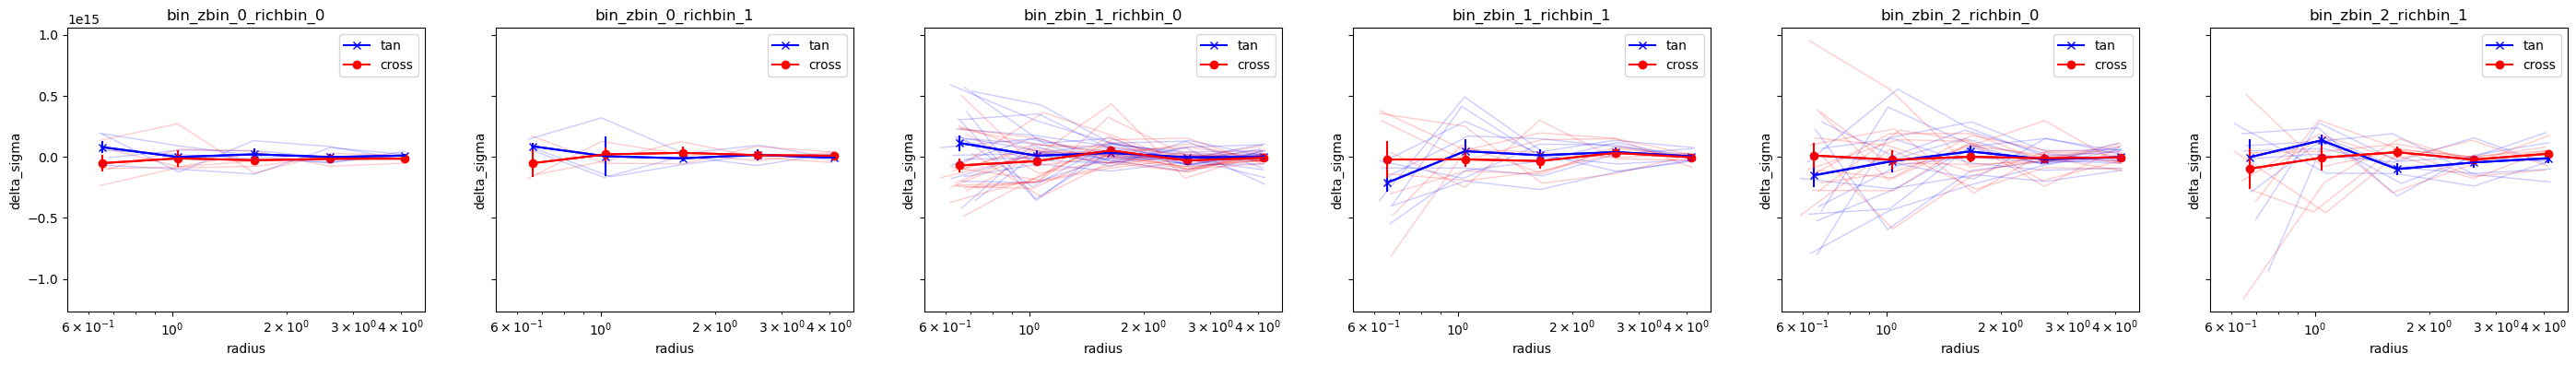

In [11]:
fig, axs = plt.subplots(1, len(data), sharex=True, sharey=True, figsize=(35, 4))
i=0
ax1=axs[0]
for k in data.keys():
    print(k)
    if data[k]['n_cl']>0:
        plot_stacked_delta_sigma_profile(data[k]['clmm_cluster_ensemble'], k , ax=ax1)
    else :
         ax1.set_title(k)
        
    i=min(i+1, len(data.keys()) - 1)
    ax1=axs[0+i]  


### Plot covariance

bin_zbin_0_richbin_0
bin_zbin_0_richbin_1
bin_zbin_1_richbin_0
bin_zbin_1_richbin_1
bin_zbin_2_richbin_0
bin_zbin_2_richbin_1


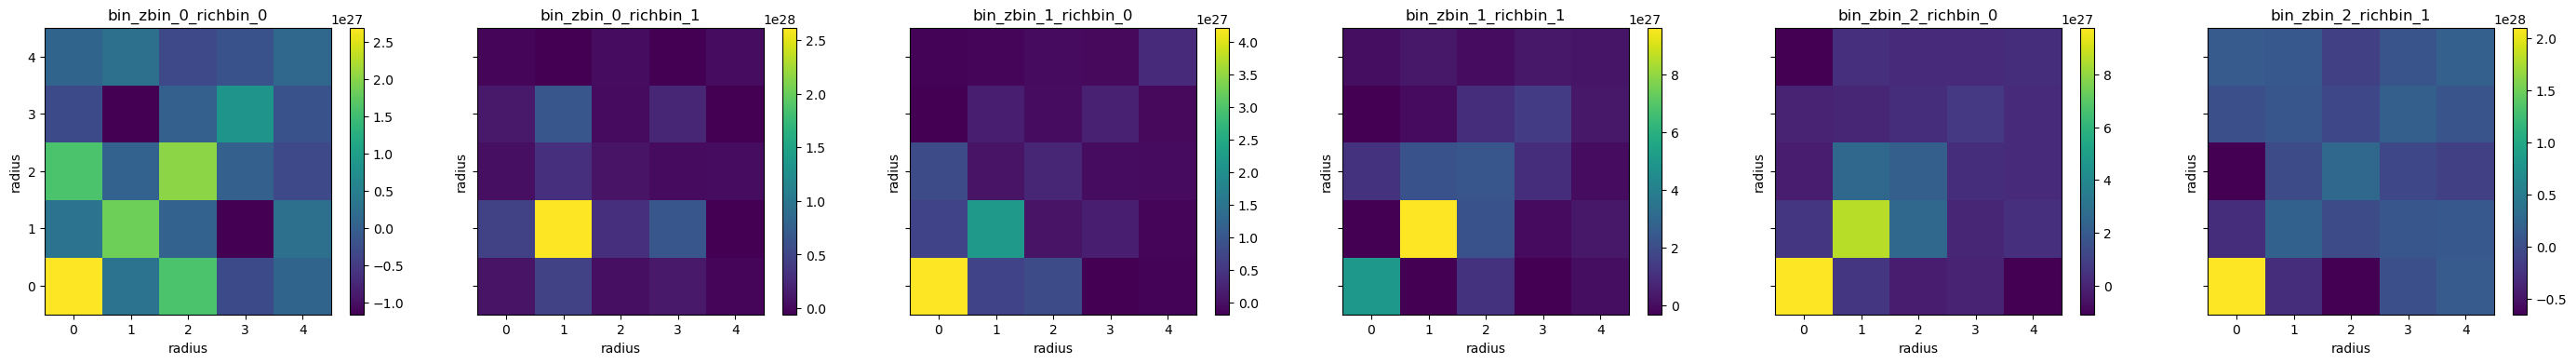

In [12]:
fig, axs = plt.subplots(1, len(data), sharex=True, sharey=True, figsize=(35, 4))
i=0

ax2=axs[0]
for k in data.keys():
    print(k)
    if data[k]['n_cl']>0:
        plot_covariance(data[k]['clmm_cluster_ensemble'], cov_type='tan_sc', title = k , ax=ax2)
    else :
         ax2.set_title(k)    
    i=min(i+1, len(data.keys()) - 1)
    ax2=axs[0+i]

bin_zbin_0_richbin_0
bin_zbin_0_richbin_1
bin_zbin_1_richbin_0
bin_zbin_1_richbin_1
bin_zbin_2_richbin_0
bin_zbin_2_richbin_1


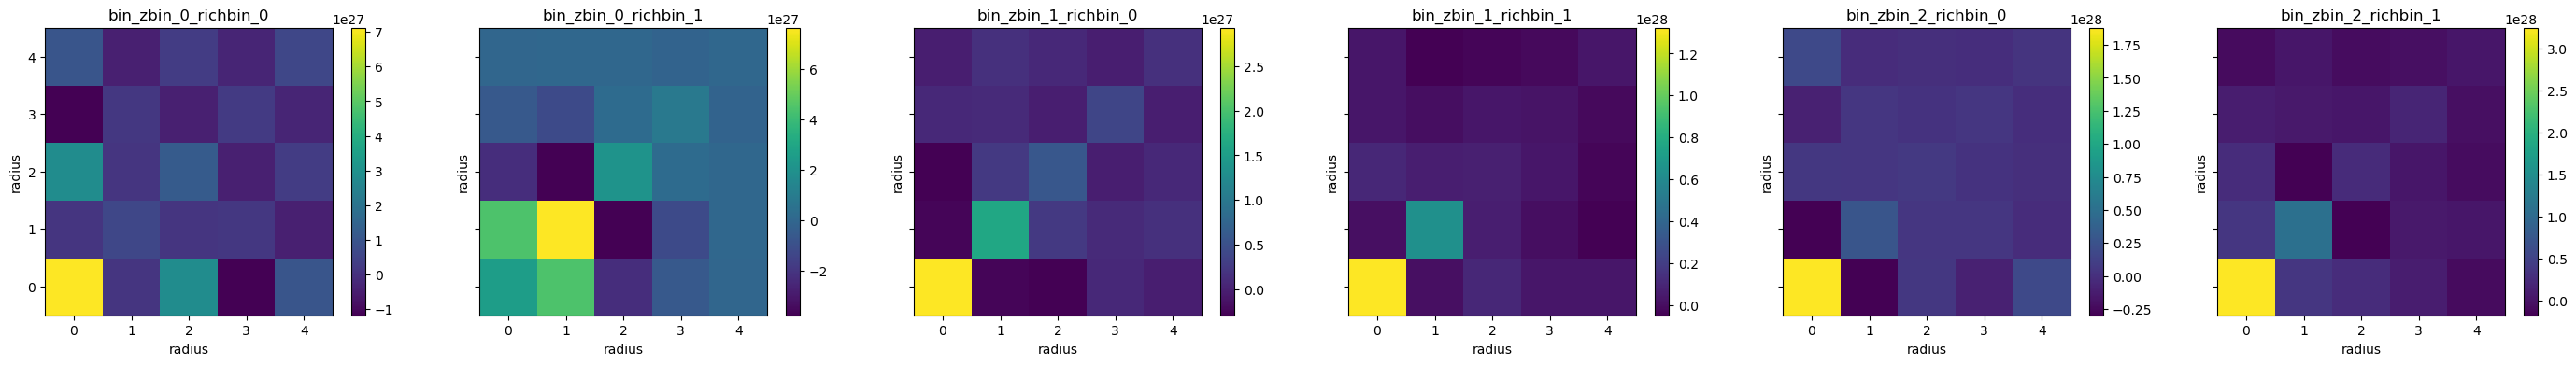

In [15]:
fig, axs = plt.subplots(1, len(data), sharex=True, sharey=True, figsize=(35, 4))
i=0

ax2=axs[0]
for k in data.keys():
    print(k)
    if data[k]['n_cl']>0:
        plot_covariance(data[k]['clmm_cluster_ensemble'], cov_type='tan_sc', title = k , ax=ax2)
    else :
         ax2.set_title(k)    
    i=min(i+1, len(data.keys()) - 1)
    ax2=axs[0+i]

# II - Let's now use the pipeline approach

Here we will use the 20deg2, but we can also use the 1deg2 files (just need to change 20deg2 to 1deg2 in the name of the files)

### Launching a pipeline

Let's have a look at the submission script for this pipeline:
- to work at CCin2p3 we can use: `examples/Cluster_pipelines/cosmodc2/20deg2-in2p3.sub`:
- to work at NERSC we can use: `examples/Cluster_pipelines/cosmodc2/20deg2-nersc.sub`:

## This comand will run the pipeline



> ### In a terminal, **navigate to your TXPipe directory on IN2P3 and run**:
>```
sbatch examples/Cluster_pipelines/cosmodc2/1deg2-in2p3.sub
```


> ### If you are **on NERSC, you will instead run**:
>```
sbatch examples/Cluster_pipelines/cosmodc2/1deg2-nersc.sub
```

## Let's look at the file content 

### Let's look at the submission_script :

=> If we use the CCin2p3 example:

In [16]:
#! cat examples/Cluster_pipelines/cosmodc2/1deg2-in2p3.sub

= > If we use the NERSC example:

In [17]:
#! cat examples/cosmodc2/1deg2-nersc.sub

### Let's look at the pipeline_file :

=> If we use the CCin2p3 example:

In [18]:
#! cat examples/cosmodc2/pipeline-1deg2-CL-in2p3.yml

= > If we use the NERSC example:

In [19]:
#! cat examples/cosmodc2/pipeline-1deg2-CL-nersc.yml

## This will test the pipeline and produce a flowchart plot
! The pipeline used here as the other stages commented to only highlight in the flowchart the CLClusterEnsembleProfiles stage.
The config file is the same. The file is written for in2p3 but it does not matter as it is a dry-run.

In [135]:
# Read the appropriate pipeline configuration, and ask for a flow-chart.
pipeline_file = "examples/cosmodc2/Cluster_pipelines/CLClusterEnsemble-20deg2-CL.yml"
flowchart_file = "CLClusterEnsemble.png"


pipeline_config = ceci.Pipeline.build_config(
    pipeline_file,
    flow_chart=flowchart_file,
    dry_run=True
)

# Run the flow-chart pipeline
ceci.run_pipeline(pipeline_config);

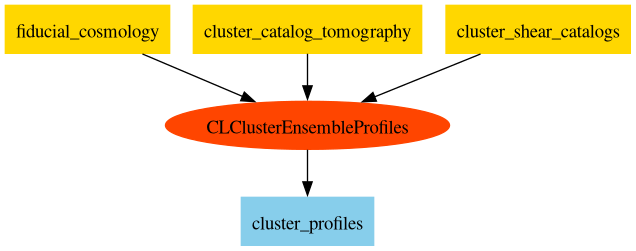

In [136]:
Image(flowchart_file)

## This loads and explore the outputs

In [18]:
with open(pipeline_file, 'r') as file:
    pipeline_content = yaml.safe_load(file)


NameError: name 'pipeline_file' is not defined

In [138]:
filename_out =pipeline_content['output_dir']+"/cluster_profiles.pkl"

In [139]:
filename_out

'./data/cosmodc2/outputs-20deg2-CL/cluster_profiles.pkl'

In [140]:
data = pkl.load(open(filename_out,"rb"))

In [141]:
with open(yaml.safe_load(pipeline_content['config']), 'r') as file:
    config_content = yaml.safe_load(file)

In [142]:
config_bin_info = config_content['CLClusterBinningRedshiftRichness']

In [143]:
config_bin_info, data['bin_zbin_0_richbin_0']['n_cl']

({'zedge': [0.2, 0.4, 0.6, 0.8, 1.0, 1.2],
  'richedge': [10, 20.0, 35.0, 200.0]},
 37)

In [ ]:
ax = plot_stacked_delta_sigma_profile(data['bin_zbin_0_richbin_2']['clmm_cluster_ensemble'], bin_name )

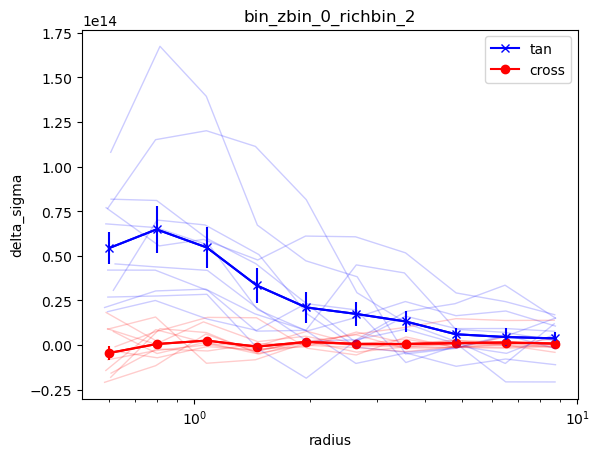

In [ ]:
plot_stacked_delta_sigma_profile(data['bin_zbin_2_richbin_2']['clmm_cluster_ensemble'], bin_name )

bin_zbin_4_richbin_0
bin_zbin_4_richbin_1
bin_zbin_4_richbin_2


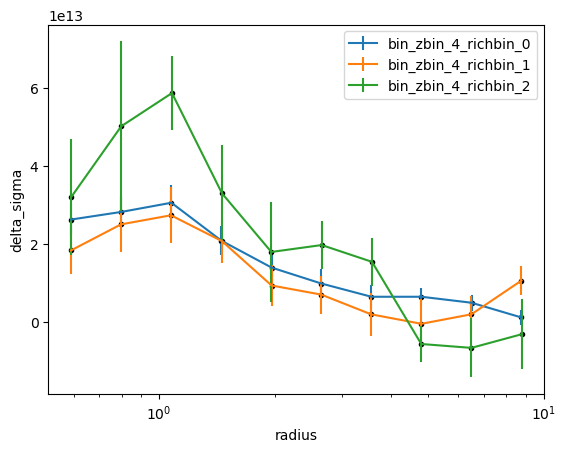

In [117]:
plot_stacked_delta_sigma_profile_together(data, richbin="vary", zbin="4", profile_type='tangeantial', title=None, ax=None)

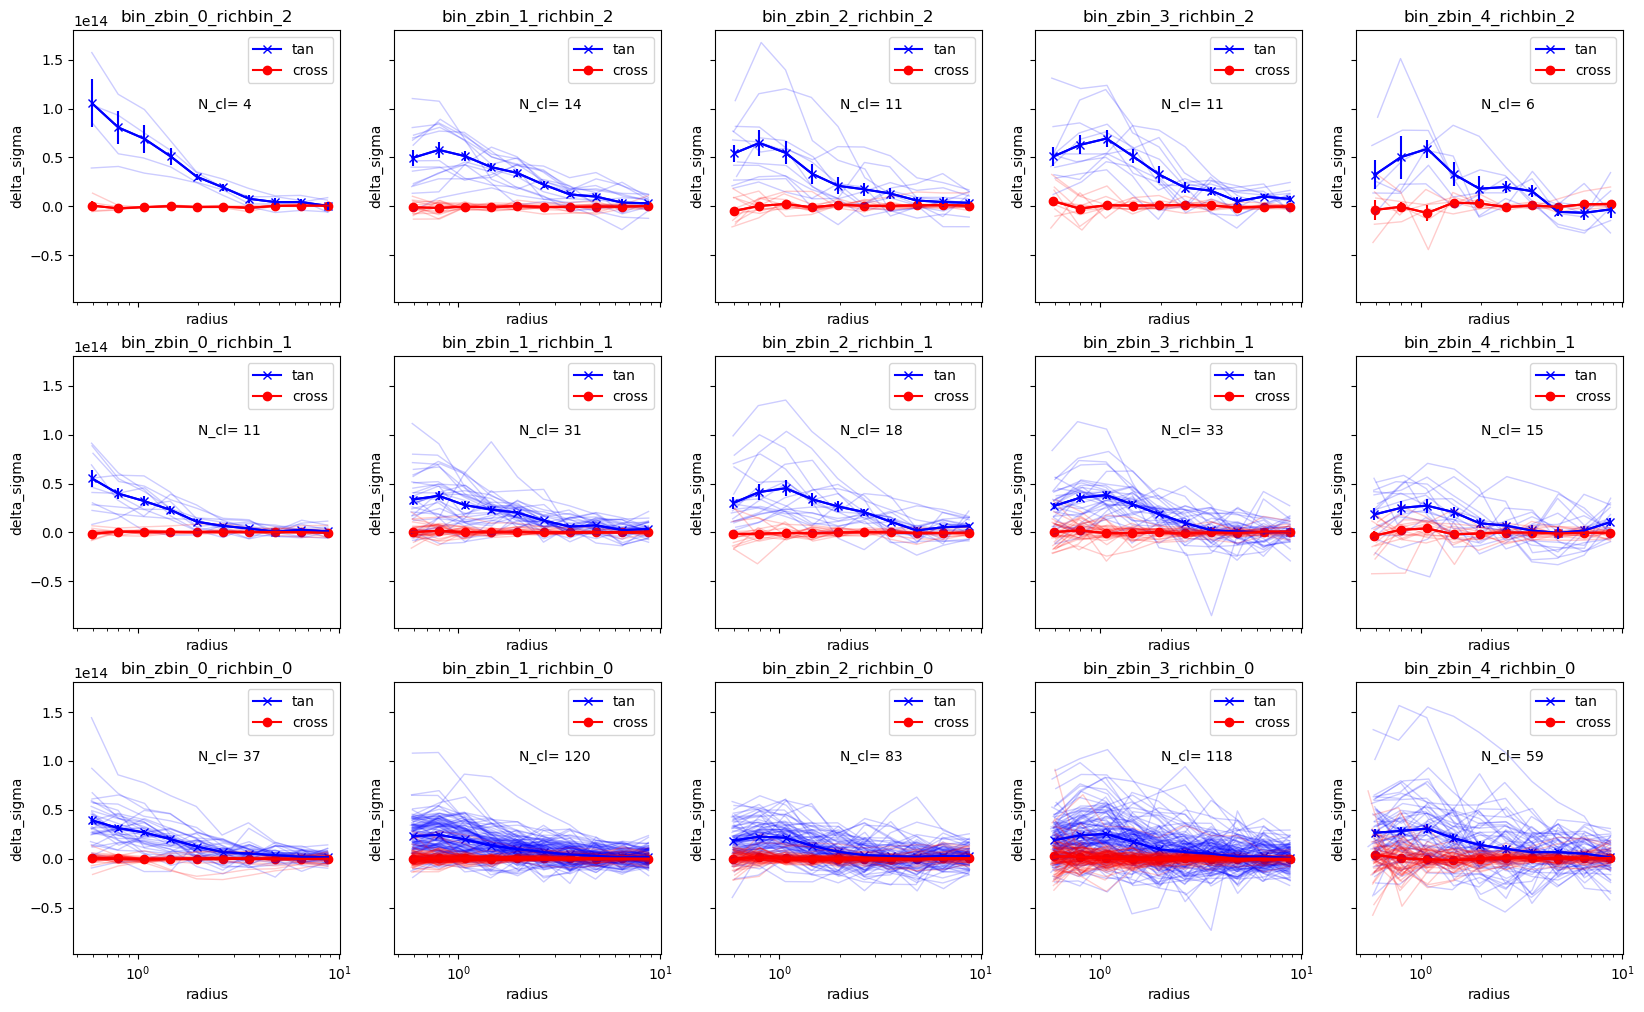

In [121]:
fig, axs = plt.subplots(len(config_bin_info['richedge'])-1, len(config_bin_info['zedge'])-1, sharex=True, sharey=True, figsize=(20, 12))

for i in range(len(config_bin_info['zedge'])-1):
    for j in range(len(config_bin_info['richedge'])-1):
        bin_name='bin_zbin_'+str(i)+'_richbin_'+str(j)
        if data[bin_name]['n_cl']>0:
            plot_stacked_delta_sigma_profile(data[bin_name]['clmm_cluster_ensemble'], bin_name , ax=axs[len(config_bin_info['richedge']) -2 -j,i])
        else :
            axs[len(config_bin_info['richedge']) -2 -j,i].set_title(bin_name)      
            
        axs[len(config_bin_info['richedge']) -2 -j,i].text(2, 1e14, 'N_cl= '+ str(data[bin_name]['n_cl'])) 
        

In [ ]:
bin

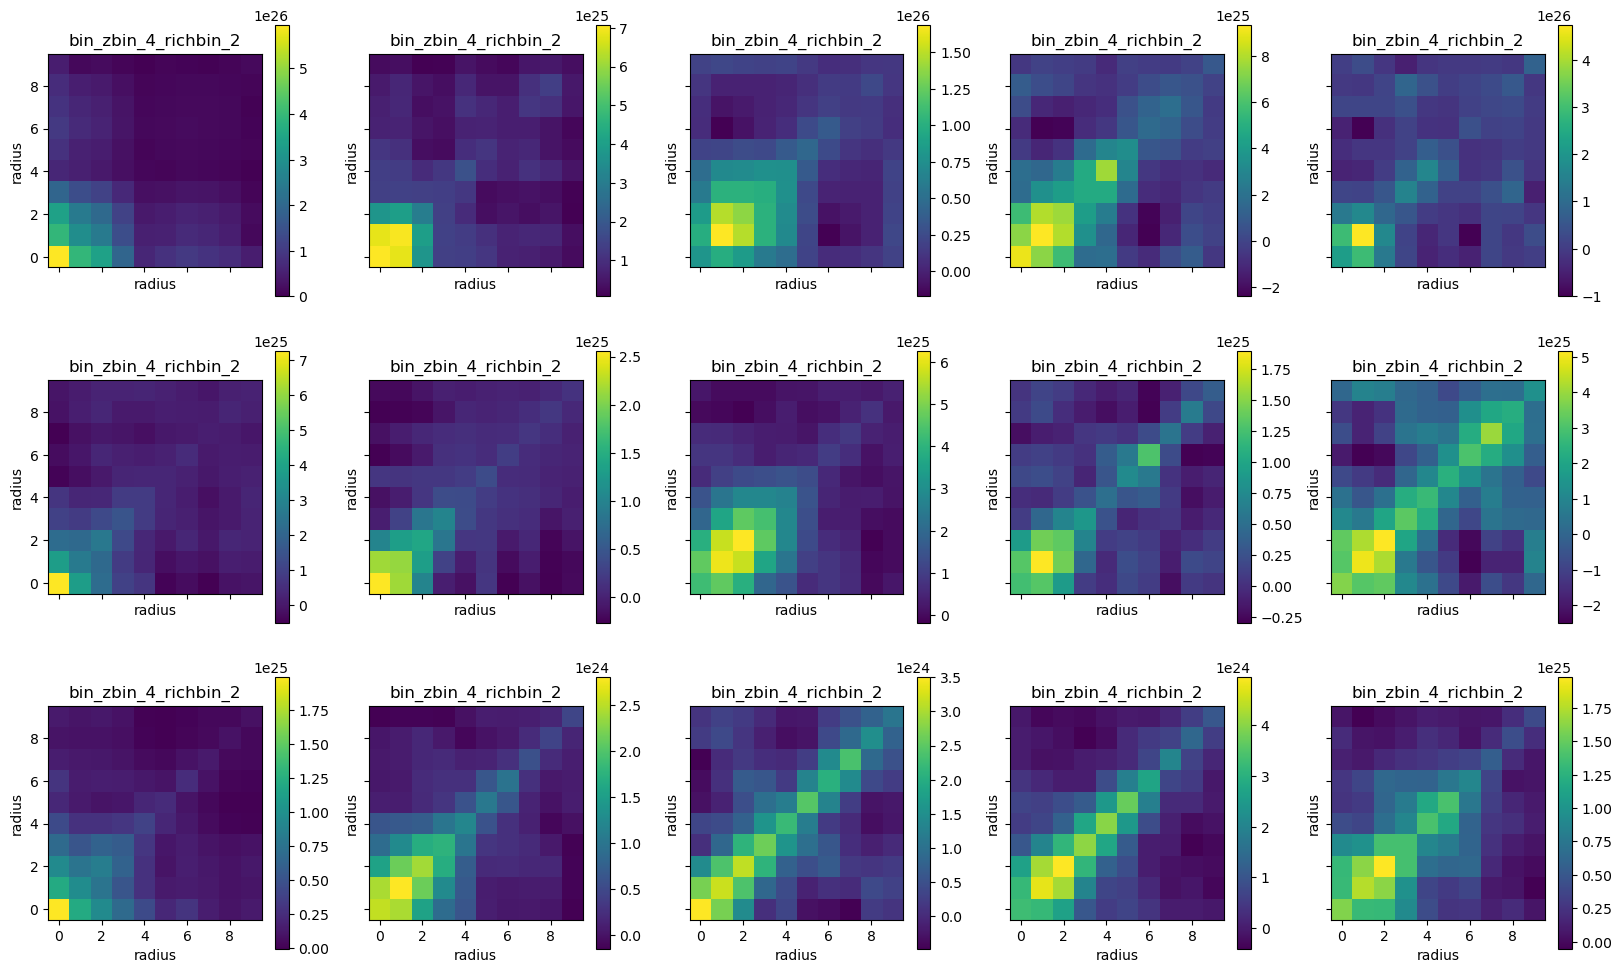

In [134]:
fig, axs = plt.subplots(len(config_bin_info['richedge'])-1, len(config_bin_info['zedge'])-1, sharex=True, sharey=True, figsize=(20, 12))

for i in range(len(config_bin_info['zedge'])-1):
    for j in range(len(config_bin_info['richedge'])-1):
        bin_name='bin_zbin_'+str(i)+'_richbin_'+str(j)

        if data[k]['n_cl']>0:
            plot_covariance(data[bin_name]['clmm_cluster_ensemble'], cov_type='tan_sc', title = k , ax=axs[len(config_bin_info['richedge']) -2 -j,i])
        else :
             ax2.set_title(k)    
        
        